<a href="https://colab.research.google.com/github/pallavinarang/Attrion/blob/main/Attrition_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Exploratory Analysis***

In [42]:
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [43]:
data = pandas.read_csv(r'/content/ATTRITION_DATA.csv')

In [44]:
data.head()

,e_code,status,hire_date,service_agreement,job_level,performance_rating_2018,performance_rating_2017,year_of_birth,gender,distance_from_home,manager_changes,no_of_promotions,risk_of_attrition,potential_rating,bonus,no_courses_taken,time_in_position,awards,signon,manager_sat,employee_sat,salary_2017,salary_2018,tenure_in_years,time_in_position_years,employee_age,high_performer_2018,promotion,bonus_score,new_learning,percent_increment
0,45631,0,9/17/1990,N,3,4,3,1967,M,0.52,1,2,2,5,0,8,30,N,N,81,80,119968,124173,28,2.5,51,Y,Y,N,Y,0.04
1,45632,0,10/23/1995,N,2,1,2,1971,M,0.08,4,3,2,5,2242,6,5,N,N,88,84,99330,100822,23,0.4,47,N,Y,Y,Y,0.02
2,45633,0,3/10/1996,N,2,4,4,1972,M,0.51,2,0,3,3,0,2,53,N,N,83,93,102511,115500,22,4.4,46,Y,N,N,Y,0.13
3,45634,0,7/13/1998,N,1,3,3,1968,F,0.81,1,0,2,5,2320,2,36,N,N,86,83,56674,58806,20,3.0,50,N,N,Y,Y,0.04
4,45635,0,9/16/1991,N,2,3,3,1961,M,0.06,4,0,2,5,0,10,2,N,N,79,80,122021,122021,27,0.2,57,N,N,N,Y,0.00


In [45]:
data.tail()

,e_code,status,hire_date,service_agreement,job_level,performance_rating_2018,performance_rating_2017,year_of_birth,gender,distance_from_home,manager_changes,no_of_promotions,risk_of_attrition,potential_rating,bonus,no_courses_taken,time_in_position,awards,signon,manager_sat,employee_sat,salary_2017,salary_2018,tenure_in_years,time_in_position_years,employee_age,high_performer_2018,promotion,bonus_score,new_learning,percent_increment
681,46267,1,7/7/2008,N,3,3,3,1966,M,1.10,0,0,4,4,6438,0,17,N,N,79,80,74999,75900,10,1.4,52,N,N,Y,N,0.01
682,46290,1,7/25/2011,N,1,2,3,1981,M,25.27,8,0,3,3,0,0,17,N,N,79,80,74999,75900,7,1.4,37,N,N,N,N,0.01
683,46312,1,11/26/2012,N,1,3,3,1967,M,1.09,1,0,4,3,0,3,43,N,N,79,80,74999,75900,6,3.6,51,N,N,N,Y,0.01
684,46336,1,7/4/2002,N,1,3,3,1980,F,0.34,5,0,3,4,0,3,27,Y,N,79,80,74999,75900,16,2.3,38,N,N,N,Y,0.01
685,46359,1,3/2/2015,Y,4,3,3,1963,M,38.62,0,0,3,5,10476,0,14,N,Y,79,80,74000,75900,3,1.2,55,N,N,Y,N,0.03


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   e_code                   686 non-null    int64  
 1   status                   686 non-null    int64  
 2   hire_date                686 non-null    object 
 3   service_agreement        686 non-null    object 
 4   job_level                686 non-null    int64  
 5   performance_rating_2018  686 non-null    int64  
 6   performance_rating_2017  686 non-null    int64  
 7   year_of_birth            686 non-null    int64  
 8   gender                   686 non-null    object 
 9   distance_from_home       686 non-null    float64
 10  manager_changes          686 non-null    int64  
 11  no_of_promotions         686 non-null    int64  
 12  risk_of_attrition        686 non-null    int64  
 13  potential_rating         686 non-null    int64  
 14  bonus                    6

In [47]:
left = data.groupby('status')
left.mean()

,e_code,job_level,performance_rating_2018,performance_rating_2017,year_of_birth,distance_from_home,manager_changes,no_of_promotions,risk_of_attrition,potential_rating,bonus,no_courses_taken,time_in_position,manager_sat,employee_sat,salary_2017,salary_2018,tenure_in_years,time_in_position_years,employee_age,percent_increment
status,,,,,,,,,,,,,,,,,,,,,
0,45923.771318,1.744186,2.827519,2.920543,1972.581395,2.295310,2.420543,0.678295,2.505814,3.784884,1006.439922,3.804264,26.637597,83.224806,81.627907,105025.856589,110210.412791,10.693798,2.228488,45.418605,0.060136
1,46292.864706,1.782353,3.100000,3.111765,1972.382353,5.964294,2.064706,0.423529,2.717647,3.417647,1374.041176,1.558824,29.494118,79.000000,79.958824,142405.835294,146225.588235,10.794118,2.466471,45.617647,0.029294


In [48]:
data.describe()

,e_code,status,job_level,performance_rating_2018,performance_rating_2017,year_of_birth,distance_from_home,manager_changes,no_of_promotions,risk_of_attrition,potential_rating,bonus,no_courses_taken,time_in_position,manager_sat,employee_sat,salary_2017,salary_2018,tenure_in_years,time_in_position_years,employee_age,percent_increment
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,46015.237609,0.247813,1.753644,2.895044,2.967930,1972.532070,3.204534,2.332362,0.615160,2.558309,3.693878,1097.536443,3.247813,27.345481,82.177843,81.214286,114289.116618,119135.456268,10.718659,2.287464,45.467930,0.052493
std,214.878836,0.432058,0.957007,1.124669,0.674125,7.734348,8.441646,2.431611,1.190229,0.734119,1.088570,2128.097198,3.063291,31.375641,4.838758,5.005909,60820.924620,60925.702367,8.696899,2.615371,7.734348,0.068182
min,45631.000000,0.000000,1.000000,1.000000,1.000000,1959.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,76.000000,70.000000,39600.000000,43903.000000,0.000000,0.000000,28.000000,0.000000
25%,45833.250000,0.000000,1.000000,2.000000,3.000000,1966.000000,0.242500,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000,7.000000,79.000000,80.000000,77033.750000,81840.000000,3.000000,0.600000,39.000000,0.010000
50%,46017.500000,0.000000,1.000000,3.000000,3.000000,1973.000000,0.450000,2.000000,0.000000,3.000000,4.000000,0.000000,2.000000,18.000000,79.000000,80.000000,98000.000000,102716.000000,8.000000,1.500000,45.000000,0.030000
75%,46199.750000,0.000000,2.000000,4.000000,3.000000,1979.000000,0.980000,4.000000,1.000000,3.000000,5.000000,2051.000000,4.000000,37.000000,85.000000,80.000000,125705.500000,132000.000000,16.000000,3.100000,52.000000,0.060000
max,46387.000000,1.000000,5.000000,5.000000,4.000000,1990.000000,50.000000,15.000000,10.000000,4.000000,5.000000,19853.000000,20.000000,278.000000,100.000000,100.000000,511500.000000,511500.000000,40.000000,23.200000,59.000000,0.580000


***Data Visualization***

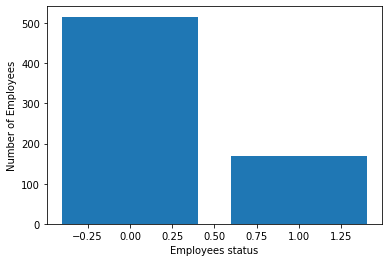

In [49]:
left_count=data.groupby('status').count()
plt.bar(left_count.index.values, left_count['employee_sat'])
plt.xlabel('Employees status')
plt.ylabel('Number of Employees')
plt.show()

In [50]:
data.status.value_counts()

0    516
1    170
Name: status, dtype: int64

In [51]:
(170/(516+170))*100

24.78134110787172

Inference is: Out of 686 employees 170 left the organization hence the attrion rate is 24.7%.

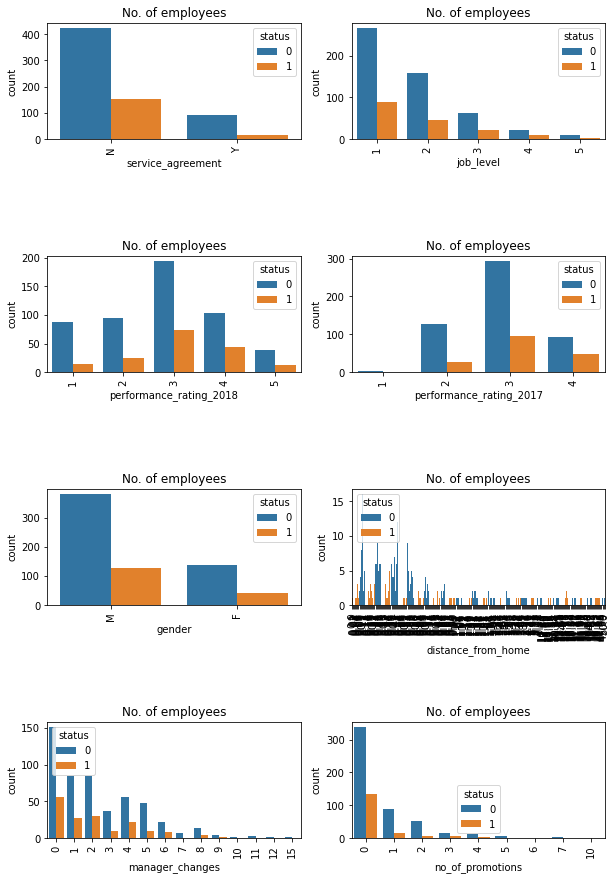

In [52]:
features = ['service_agreement','job_level','performance_rating_2018','performance_rating_2017','gender','distance_from_home','manager_changes','no_of_promotions']
fig = plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='status')
    plt.xticks(rotation=90)
    plt.title("No. of employees")

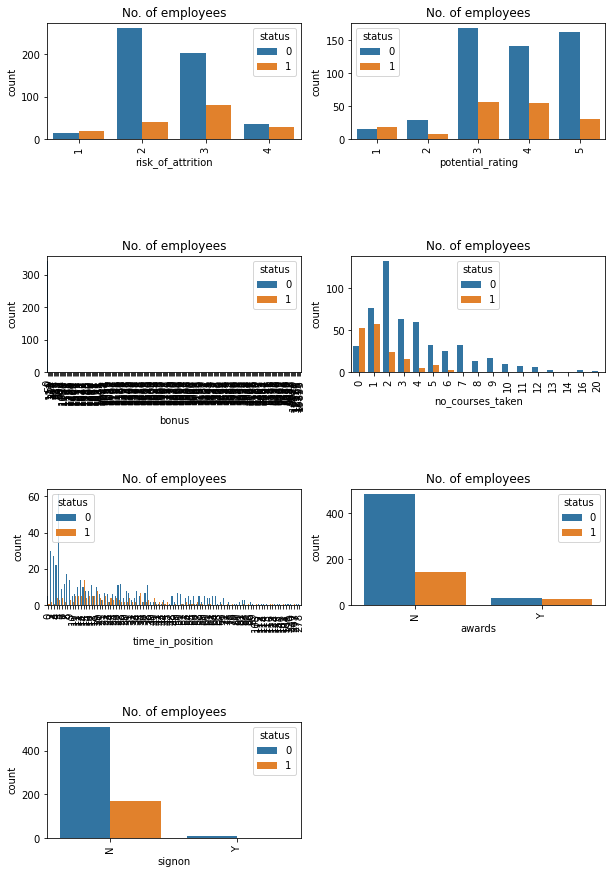

In [53]:
features = ['risk_of_attrition','potential_rating','bonus','no_courses_taken','time_in_position','awards','signon']
fig = plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='status')
    plt.xticks(rotation=90)
    plt.title("No. of employees")

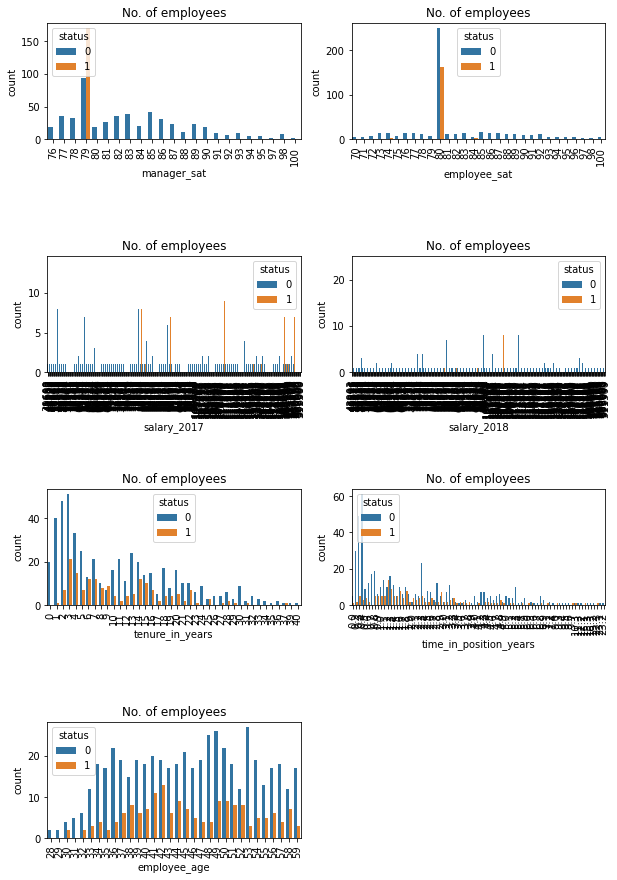

In [54]:
features = ['manager_sat','employee_sat','salary_2017','salary_2018','tenure_in_years','time_in_position_years','employee_age']
fig = plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='status')
    plt.xticks(rotation=90)
    plt.title("No. of employees")

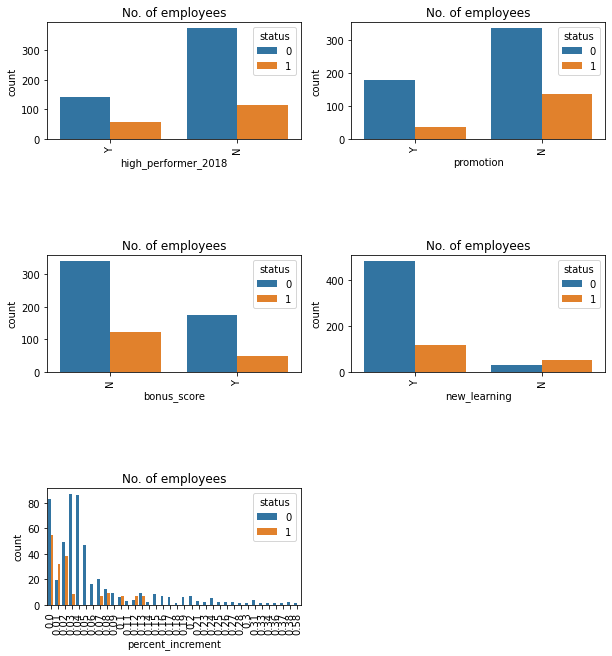

In [57]:
features = ['high_performer_2018','promotion','bonus_score','new_learning','percent_increment']
fig = plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='status')
    plt.xticks(rotation=90)
    plt.title("No. of employees")

***Cluster Analysis***

In [59]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['employee_sat', 'percent_increment']][data.status == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

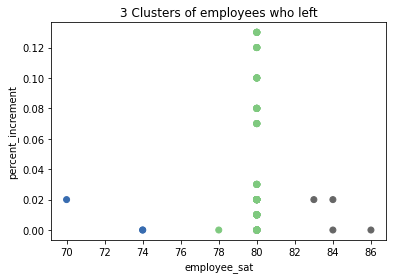

In [60]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['employee_sat'], left_emp['percent_increment'], c=left_emp['label'],cmap='Accent')
plt.xlabel('employee_sat')
plt.ylabel('percent_increment')
plt.title('3 Clusters of employees who left')
plt.show()

In [62]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['performance_rating_2018', 'percent_increment']][data.status == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

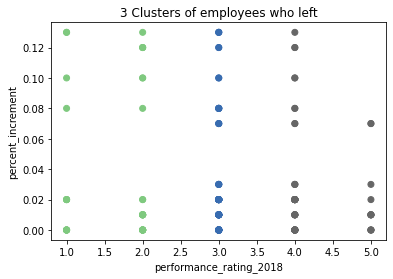

In [64]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['performance_rating_2018'], left_emp['percent_increment'], c=left_emp['label'],cmap='Accent')
plt.xlabel('performance_rating_2018')
plt.ylabel('percent_increment')
plt.title('3 Clusters of employees who left')
plt.show()

In [89]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['tenure_in_years', 'distance_from_home']][data.status == 0]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

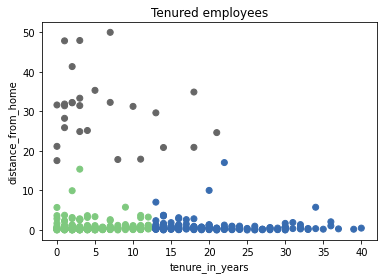

In [90]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['tenure_in_years'], left_emp['distance_from_home'], c=left_emp['label'],cmap='Accent')
plt.xlabel('tenure_in_years')
plt.ylabel('distance_from_home')
plt.title('Tenured employees')
plt.show()

In [121]:
data = pandas.read_csv(r'/content/ATTRITION_DATA.csv')
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['performance_rating_2018', 'no_courses_taken']][data.status == 0]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

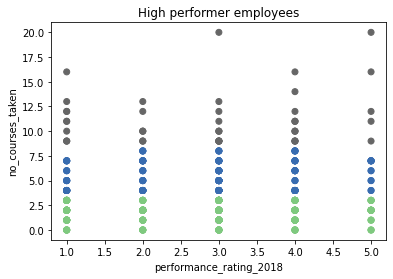

In [122]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['performance_rating_2018'], left_emp['no_courses_taken'], c=left_emp['label'],cmap='Accent')
plt.xlabel('performance_rating_2018')
plt.ylabel('no_courses_taken')
plt.title('High performer employees')
plt.show()

***Correlation Matrix***


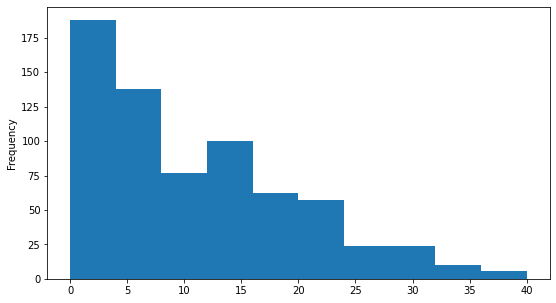

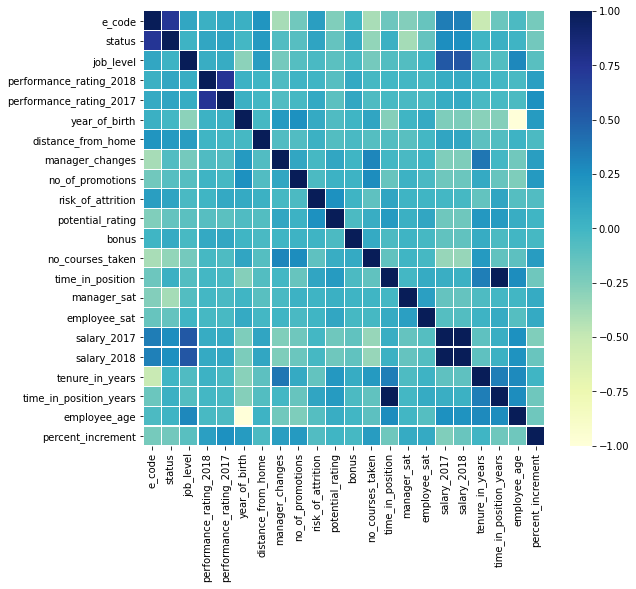

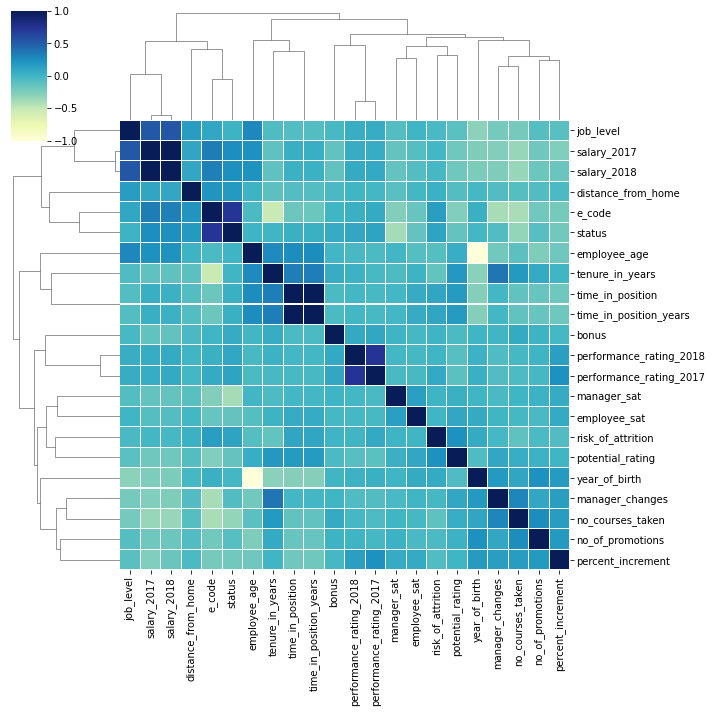

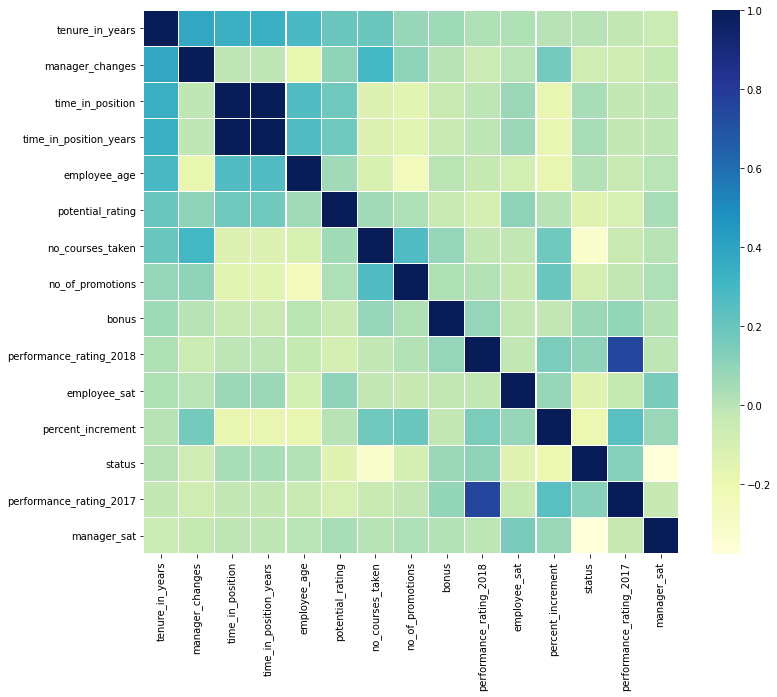

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

data = pd.read_csv(r'/content/ATTRITION_DATA.csv')

data['tenure_in_years'].describe()

plt.figure(figsize = (9, 5))
data['tenure_in_years'].plot(kind ="hist")

corrmat = data.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

corrmat = data.corr()
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
  
cg

# tenure correlation matrix
# k : number of variables for heatmap
k = 15 
  
cols = corrmat.nlargest(k, 'tenure_in_years')['tenure_in_years'].index
  
cm = np.corrcoef(data[cols].values.T)
f, ax = plt.subplots(figsize =(12, 10))
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",
            linewidths = 0.1, yticklabels = cols.values,
                              xticklabels = cols.values)


***Gradient Boost Prediction Model***

In [128]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
X=data[['job_level','performance_rating_2018','performance_rating_2017','year_of_birth','distance_from_home','manager_changes','no_of_promotions','risk_of_attrition','potential_rating','bonus','no_courses_taken','time_in_position','manager_sat','employee_sat','salary_2017','salary_2018','tenure_in_years','time_in_position_years','employee_age','percent_increment']]
y=data['status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

print(y_pred)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1]
Accuracy: 0.9514563106796117
Precision: 0.8909090909090909
Recall: 0.9245283018867925
